In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re
from normalize import KazAnalysis


In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('DATA.txt', sep='#',header=None, names=['Data','Class'])
data.head()

Data  Class
0  Телефонның үш камерасы бар. Телефонның пішіні ...    1.0
1  Кейде телефонның экраны бұлыңғыр болады. Сауса...    0.0
2  Оны кепілдік бойынша жөндеуге қалдырдым.Алдыңғ...    0.0
3  Телефон мен  күткендей болмады. Қуаттау  кезін...    0.0
4  Бейне файлдармен жұмыс істеу жылдамдығы өте ұзақ.    0.0

In [7]:
# data.Data=data.Data.astype(str)
# data.Class=data.Class.astype(int)
# data['Data'] = data['Data'].apply(lambda x: x.lower())
# data['Data'] = data['Data'].apply((lambda x: re.sub('[^а-яА-Яәіңөғүұқ0-9\s]','',x)))
# data.head()

In [11]:
analysis=KazAnalysis()
analysis.lemmatization('шығып')[0]['word']

'шық'

In [ ]:
import string

def process_text(text):
    #lemmatiztor zhane stopWord spisoc    
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"\n", " ", text)

    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
#     stops=analysis.stopWord
#     text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^а-яА-Яa-zA-ZәіңғүұқөһҺӨҚҰҮҒҢІӘ-]", " ", text)
    #text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"\s{2,}", " ", text)
    # Лемматизация
    text = text.split()
    normal_words = [analysis.lemmatization(word)[0]['word']  for word in text if len(word)>2]
    text = " ".join(normal_words)
    return text

data['Data'] = df['Data'].map(lambda x: process_text(x))
data.head()

1508
1508


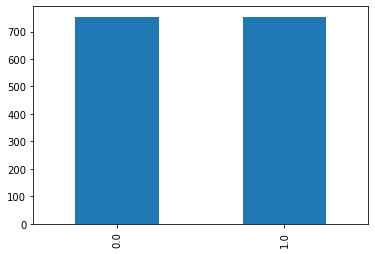

In [5]:
print(data[ data['Class'] == 1].size)
print(data[ data['Class'] == 0].size)
data['Class'].value_counts().plot.bar();

In [32]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Data'].values)
X = tokenizer.texts_to_sequences(data['Data'].values)
X = pad_sequences(X)
X[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   57,
         440,   26,    6,   57,  441,   27,  232,  135,  323,   13],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  160,   57,
          97,  442,    5,  188,  324,  946,  947,   58,    3,   40],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  233,  705,  380,  706, 1524,   33,  128,  136],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    

In [59]:
vocab = set()
data['Data'].str.lower().str.split().apply(vocab.update)
print(vocab)


{'қыметкерлеріне', 'құлаққапбасқа', 'жинамайды', '4', 'оперативті', 'втты', 'орнатып', 'ішіне', 'отырсаң', 'жеткізудегі', 'дәрежесі', 'керек', 'тұратын', 'порттар', 'көрсеткіштерді', 'орналастырылған', 'батырмаларымен', 'түс', 'жарығы', '30', 'сериямен', 'кетедб', 'программалардағы', 'қатысады', '50', 'яғни', 'пиксельге', 'гоборит', 'металлы', 'қағаздардарға', 'дауыс', 'графикасы', 'сізге', 'фильтры', 'жеткізуге', 'ауыр', 'экранының', 'көрсетіп', 'тұрақты', 'ұсынылған', 'видеоны', 'дизайының', 'түсініксіз', 'бағасы', 'бөгде', '3000', 'жүргеніп', 'үйімнен', 'толтырмайды', 'суырып', 'жаңартқан', 'атты', 'интерфейс', '446', 'бақылау', 'пайдану', 'кідірістер', 'түсетін', 'өту', 'келтіреді', 'қағаздарға', 'сезініп', 'процессорлар', 'бөлімдерн', '2020', 'жұыс', 'қойсаң', 'жабылып', 'үнемі', 'сақтау', 'қалған', 'сапада', 'экран', 'екінші', 'бірін', 'қосылатындықтан', 'кішіргім', 'теріп', 'берілді', 'функциялар', 'сырттан', 'телефонның', 'кетеді', '264', 'видеокарталар', 'қараңғыда', 'қосылаты

In [33]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 43, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 43, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
Y = pd.get_dummies(data['Class']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1212, 43) (1212, 2)
(303, 43) (303, 2)


In [35]:
batch_size = 100
history=model.fit(X_train, Y_train, epochs = 40, batch_size=batch_size, verbose = 1)

Epoch 1/40
13/13 [==============================] - 2s 152ms/step - loss: 0.6839 - accuracy: 0.5685
Epoch 2/40
13/13 [==============================] - 2s 142ms/step - loss: 0.6403 - accuracy: 0.7178
Epoch 3/40
13/13 [==============================] - 2s 138ms/step - loss: 0.4813 - accuracy: 0.8028
Epoch 4/40
13/13 [==============================] - 2s 135ms/step - loss: 0.2948 - accuracy: 0.8977
Epoch 5/40
13/13 [==============================] - 2s 136ms/step - loss: 0.1840 - accuracy: 0.9315
Epoch 6/40
13/13 [==============================] - 2s 136ms/step - loss: 0.1240 - accuracy: 0.9497
Epoch 7/40
13/13 [==============================] - 2s 134ms/step - loss: 0.0957 - accuracy: 0.9620
Epoch 8/40
13/13 [==============================] - 2s 134ms/step - loss: 0.0779 - accuracy: 0.9703
Epoch 9/40
13/13 [==============================] - 2s 137ms/step - loss: 0.0587 - accuracy: 0.9810
Epoch 10/40
13/13 [==============================] - 2s 150ms/step - loss: 0.0528 - accuracy: 0.9827

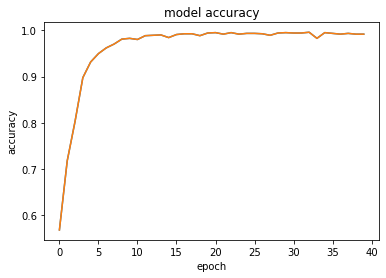

In [36]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

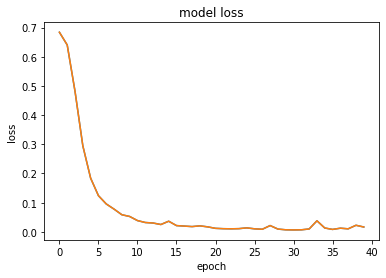

In [37]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
Y_pred = model.predict_classes(X_test,batch_size = batch_size)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [39]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[122  24]
 [ 38 119]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       146
           1       0.83      0.76      0.79       157

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



In [40]:
# Separate majority and minority classes
data_majority = data[data['Class'] == 0]
data_minority = data[data['Class'] == 1]

bias = data_minority.shape[0]/data_majority.shape[0]
# lets split train/test data first then 
train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [41]:
print('positive data in training:',(train.Class == 1).sum())
print('negative data in training:',(train.Class == 0).sum())
print('positive data in test:',(test.Class == 1).sum())
print('negative data in test:',(test.Class == 0).sum())

positive data in training: 603
negative data in training: 603
positive data in test: 151
negative data in test: 151


In [42]:
# Separate majority and minority classes in training data for upsampling 
data_majority = train[train['Class'] == 0]
data_minority = train[train['Class'] == 1]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",data_upsampled.Class.value_counts(),sep = "")

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Data'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['Data'].values)
X_train = pad_sequences(X_train,maxlen=29)
Y_train = pd.get_dummies(data_upsampled['Class']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['Data'].values)
X_test = pad_sequences(X_test,maxlen=29)
Y_test = pd.get_dummies(test['Class']).values
print("x_test shape", X_test.shape)

majority class before upsample: (603, 2)
minority class before upsample: (603, 2)
After upsampling
1.0    603
0.0    603
Name: Class, dtype: int64
x_train shape: (1206, 29)
x_test shape (302, 29)


In [43]:
# model
embed_dim = 128
lstm_out = 192

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 29, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 192)               246528    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 386       
Total params: 502,914
Trainable params: 502,914
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
batch_size = 100
# also adding weights
class_weights = {0: 1 ,
                1: 1.6/bias }
history=model.fit(X_train, Y_train, epochs = 40, batch_size=batch_size, verbose = 1,
          class_weight=class_weights)

Epoch 1/40
13/13 [==============================] - 1s 109ms/step - loss: 0.8609 - accuracy: 0.5108
Epoch 2/40
13/13 [==============================] - 1s 110ms/step - loss: 0.8208 - accuracy: 0.5124
Epoch 3/40
13/13 [==============================] - 1s 109ms/step - loss: 0.6955 - accuracy: 0.6368
Epoch 4/40
13/13 [==============================] - 2s 124ms/step - loss: 0.4407 - accuracy: 0.8980
Epoch 5/40
13/13 [==============================] - 2s 128ms/step - loss: 0.2511 - accuracy: 0.9328
Epoch 6/40
13/13 [==============================] - 2s 130ms/step - loss: 0.1790 - accuracy: 0.9502
Epoch 7/40
13/13 [==============================] - 2s 133ms/step - loss: 0.1311 - accuracy: 0.9718
Epoch 8/40
13/13 [==============================] - 2s 120ms/step - loss: 0.0871 - accuracy: 0.9760
Epoch 9/40
13/13 [==============================] - 1s 109ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 10/40
13/13 [==============================] - 1s 109ms/step - loss: 0.0524 - accuracy: 0.9851

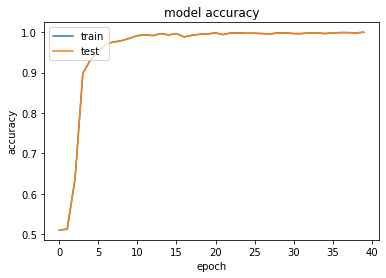

In [45]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

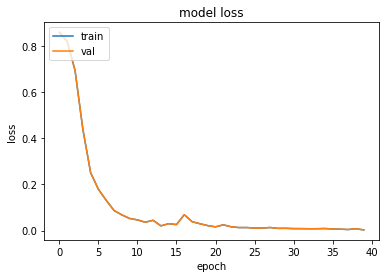

In [46]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
Y_pred = model.predict_classes(X_test,batch_size = batch_size)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[130  21]
 [ 48 103]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       151
           1       0.83      0.68      0.75       151

    accuracy                           0.77       302
   macro avg       0.78      0.77      0.77       302
weighted avg       0.78      0.77      0.77       302



In [50]:
twt = ['қызмет көрсету нашар оригинал зат қымбаттау, ал копияларында сапа төмен']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  468   36 1701  896  753  208
    63]]
1/1 - 0s
negative
